Importing Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
dataset = pd.read_csv("diabetes.csv")

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
import pandas as pd
# dataset = pd.read_csv("diabetes.csv")
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.022,random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = RandomForestClassifier()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# tree = DecisionTreeClassifier()
# bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
# bagging_clf.fit(X_train, y_train)

# y_train_pred = bagging_clf.predict(X_train)
# evaluate(bagging_clf, X_train, X_test, y_train, y_test)

1.0


preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in dataset.columns:
        labelencoder_X=LabelEncoder()
        dataset[i]=labelencoder_X.fit_transform(dataset[i])

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


train test split

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


Hybrid Models

K-nn + Random Forest


Accuracy of Hybrid model (K-nn, Random Forest) = 88.24 %


Confusion Matrix:


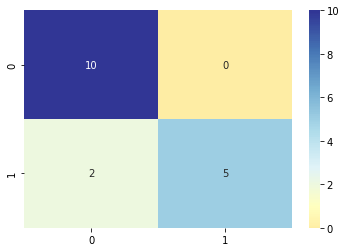



Classification Report: 

               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.71      0.83         7

    accuracy                           0.88        17
   macro avg       0.92      0.86      0.87        17
weighted avg       0.90      0.88      0.88        17



In [ ]:

model1 = KNeighborsClassifier()
model2 = RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('knn', model1), ('rf', model2)], voting='hard')
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

print()
print('Accuracy of Hybrid model (K-nn, Random Forest) = {} %'.format(round(accuracy_score(y_test, y_pred)*100,2)))
print('\n')

# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="RdYlBu")
plt.show()
print('\n')
    
#classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n", classification_report(y_test,y_pred))

AdaBoost + Random Forest


Accuracy of Hybrid model (AdaBoost, Random Forest) = 94.12


Confusion Matrix: 


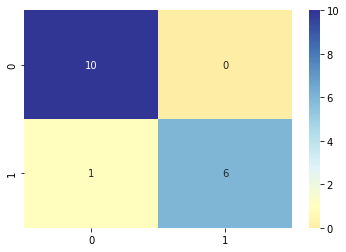



Classification Report: 

               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.86      0.92         7

    accuracy                           0.94        17
   macro avg       0.95      0.93      0.94        17
weighted avg       0.95      0.94      0.94        17



In [ ]:

model1 = AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)
model2 = RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('knn', model1), ('rf', model2)], voting='hard')
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

print()
print('Accuracy of Hybrid model (AdaBoost, Random Forest) = {}'.format(round(accuracy_score(y_test, y_pred)*100,2)))
print('\n')

# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
    
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="RdYlBu")
plt.show()
print('\n')
    
#classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n",classification_report(y_test,y_pred))

XG Boost + AdaBoost + Random Forest


Accuracy for training set for Hybrid model (XG Boost, AdaBoost, Random Forest) = 82.47


Confusion Matrix: 



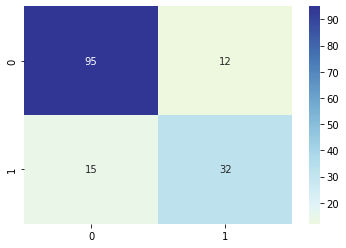



Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



In [ ]:

model_1 = XGBClassifier(learning_rate=1, n_estimators=1000)
model_2 = AdaBoostClassifier(learning_rate=1, n_estimators=1000)
model_3 = RandomForestClassifier(n_estimators=1000, random_state=42)

estimators = []

estimators.append(('xgb',model_1))
estimators.append(('adaboost',model_2))
estimators.append(('clf',model_3))

hybrid_model = StackingClassifier(estimators)

hybrid_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = hybrid_model.predict(X_test)

print()
print('Accuracy for training set for Hybrid model (XG Boost, AdaBoost, Random Forest) = {}'.format(round(accuracy_score(y_test, y_pred)*100,2)))
print('\n')

# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n')
    
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="RdYlBu")
plt.show()
print('\n')
    
#classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n",classification_report(y_test,y_pred))


Accuracy of Hybrid model (XG Boost, AdaBoost, Random Forest) = 100.0


Confusion Matrix: 


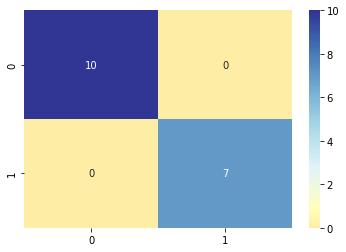



Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [ ]:
# Predicting the Test set results
y_pred = lr.predict(X_test)

print()
print('Accuracy of Hybrid model (XG Boost, AdaBoost, Random Forest) = {}'.format(round(accuracy_score(y_test, y_pred)*100,2)))
print('\n')

# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
    
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="RdYlBu")
plt.show()
print('\n')
    
#classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n",classification_report(y_test,y_pred))


Accuracy for training set for Hybrid model (XG Boost, AdaBoost, Random Forest) = 100.0


Confusion Matrix: 



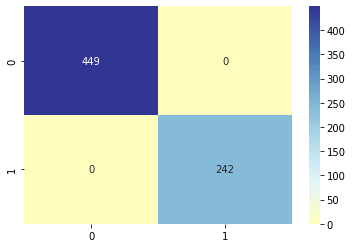



Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       242

    accuracy                           1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



In [ ]:



# y_pred = lr.predict(y_train_pred)
# print(accuracy_score(y_test, y_pred))
print()
print('Accuracy for training set for Hybrid model (XG Boost, AdaBoost, Random Forest) = {}'.format(round(accuracy_score(y_train, y_train_pred)*100,2)))
print('\n')

# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix: \n')
    
# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d" ,cmap="RdYlBu")
plt.show()
print('\n')
    
#classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n",classification_report(y_train, y_train_pred))

In [ ]:
from keras.utils.np_utils import to_categorical

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

labels = to_categorical(y)
print(labels.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size = 0.1,random_state = 0)

(768, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Activation,BatchNormalization, Bidirectional, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, GlobalMaxPool1D, LSTM
from keras import utils
from tensorflow.keras.optimizers import Adam

In [ ]:
seq_model = Sequential()
# seq_model.add(Dense(81, activation='relu'))
# seq_model.add(BatchNormalization())
# seq_model.add(Dense(27, activation='relu'))
# seq_model.add(BatchNormalization())
seq_model.add(Dense(9, activation='relu'))
seq_model.add(BatchNormalization())
seq_model.add(Dense(2, activation='softmax'))
# seq_model.summary()

In [ ]:
seq_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.001),
                  metrics=['accuracy'])
seq_model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
44/44 [==============================] - 2s 12ms/step - loss: 0.4906 - accuracy: 0.7554 - val_loss: 0.4299 - val_accuracy: 0.8701
Epoch 2/50
44/44 [==============================] - 0s 5ms/step - loss: 0.4970 - accuracy: 0.7569 - val_loss: 0.4320 - val_accuracy: 0.8571
Epoch 3/50
44/44 [==============================] - 0s 5ms/step - loss: 0.4929 - accuracy: 0.7641 - val_loss: 0.4291 - val_accuracy: 0.8571
Epoch 4/50
44/44 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7482 - val_loss: 0.4256 - val_accuracy: 0.8831
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7656 - val_loss: 0.4255 - val_accuracy: 0.8831
Epoch 6/50
44/44 [==============================] - 0s 5ms/step - loss: 0.4913 - accuracy: 0.7540 - val_loss: 0.4290 - val_accuracy: 0.8701
Epoch 7/50
44/44 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7482 - val_loss: 0.4293 - val_accuracy: 0.8701
Epoch 8/50
44/44 [=

prediction

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
lr = hybrid_model

In [ ]:
def classNames(pred):
    if pred[0] == 1:
        return "POSITIVE"
    else:
        return "NEGATIVE"

In [ ]:
X_train

In [ ]:
x = [6,	148,	72,	35,	0,	33.6,	0.627,	50]
pred = model.predict([x])
# print(pred)
print(classNames(pred))

POSITIVE


In [ ]:
x = [1,	85,	66,	29,	0,	26.6,	0.351,	31]
pred = model.predict([x])
# print(pred)
print(classNames(pred))

NEGATIVE
